In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
cd /content/drive/MyDrive/ML\ assignment\ 2

In [ ]:
from copy import *
from math import *
import h5py
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.decomposition import TruncatedSVD

In [ ]:

# reading .h5 file
hf=h5py.File('part_A_train.h5','r')
X=np.array(hf['X'])
Y=np.array(hf['Y'])

[r,c]=Y.shape
yy=np.array([])
for i in range(r):
    for j in range(c):
        if Y[i,j]==1:
            yy=np.append(yy,[int(j)])

Y=yy.reshape(-1,1)

# 80 20 split on data and stratified samppling
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=1,stratify=Y)

scaler=StandardScaler()
Xtrain=scaler.fit_transform(Xtrain)
Xtest=scaler.transform(Xtest)
# standardise the dataset for 0 mean and 1 std dev


print("Training Set")
d1=[0]*10
for i in range(len(Ytrain)):
    d1[int(Ytrain[i][0])]+=1
# converting y from 1 hot encoding to discrete value from 0 to 9
for i in range(len(d1)):
    print("class ",i,"= ",d1[i])

print()
print("Testing Set")
d1=[0]*10
for i in range(len(Ytest)):
    d1[int(Ytest[i][0])]+=1

for i in range(len(d1)):
    print("class ",i,"= ",d1[i])

print()
# print(Xtrain.shape)


# ______________________________________________________________________________________________________________________________________



Training Set
class  0 =  320
class  1 =  395
class  2 =  314
class  3 =  339
class  4 =  333
class  5 =  319
class  6 =  353
class  7 =  345
class  8 =  328
class  9 =  314

Testing Set
class  0 =  80
class  1 =  99
class  2 =  79
class  3 =  85
class  4 =  83
class  5 =  79
class  6 =  88
class  7 =  86
class  8 =  82
class  9 =  79



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for Training Set:  89.13690476190477
Accuracy for Test Set:  85.95238095238096


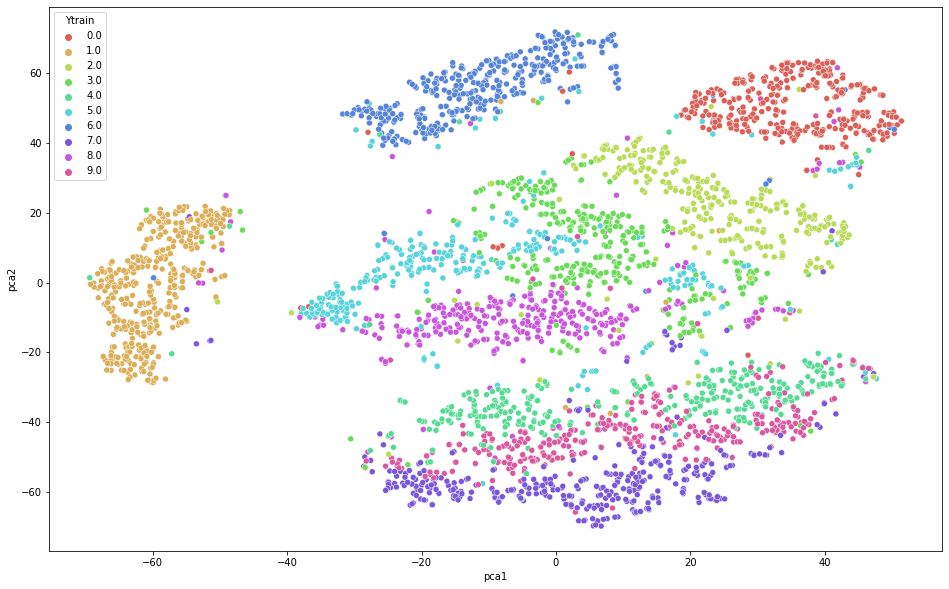

In [ ]:
# creating an object of class PCA with a random state to give consistent results over time
# optimised my model using manual testing and trialling of n_components value, 25 gives best results
p=PCA(random_state=20,n_components=25)
Xtrain_pca=p.fit_transform(Xtrain)
Xtest_pca=p.transform(Xtest)
# fitting our model on Xtrain and transforming both Xtrain and Xtest

logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(Xtrain_pca,Ytrain)
# training logistic regression model to predict values for Xtest and Xtrain both

ypred_train=logistic_regression.predict(Xtrain_pca)
ypred_test=logistic_regression.predict(Xtest_pca)

# accuracy obtained by comparing actual values and predicted values
print("Accuracy for Training Set: ", metrics.accuracy_score(Ytrain, ypred_train)*100)
print("Accuracy for Test Set: ", metrics.accuracy_score(Ytest, ypred_test)*100)


# creating an object of class TSNE with a random state to give consistent results over time
xx=TSNE(random_state=0)
X_TSNE=xx.fit_transform(Xtrain_pca)
tsne_df = pd.DataFrame(columns = ['pca1','pca2','Ytrain'])
tsne_df["pca1"]=X_TSNE[:,0]
tsne_df["pca2"]=X_TSNE[:,1]
tsne_df["Ytrain"]=Ytrain
# creating a dataframe of both dimensions of TSNE model and Ytrain to visualize plots

# plotting our TSNE plot with labels on side
plt.figure(figsize=(16,10))
sns.scatterplot(x="pca1", y="pca2", hue="Ytrain",data=tsne_df,palette=sns.color_palette("hls", 10),legend="full")
plt.show()
# # ______________________________________________________________________________________________________________________________________


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for Training Set:  89.25595238095238
Accuracy for Test Set:  85.71428571428571


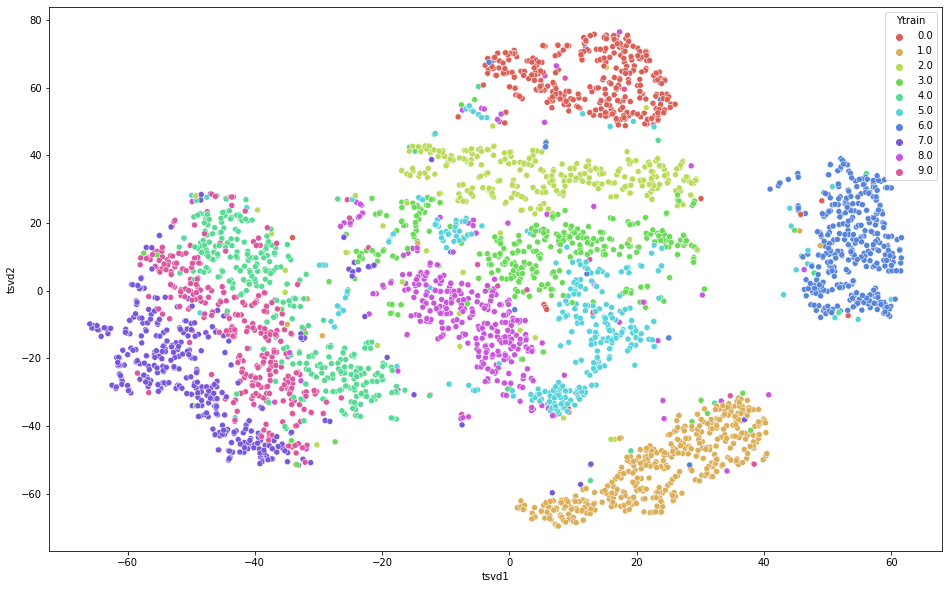

In [ ]:

# creating an object of class SVD with a random state to give consistent results over time
# optimised my model using manual testing and trialling of n_components value, 25 gives best results
tsvd=TruncatedSVD(random_state=20,n_components=25)
Xtrain_tsvd=tsvd.fit_transform(Xtrain)
Xtest_tsvd=tsvd.transform(Xtest)
# fitting our model on Xtrain and transforming both Xtrain and Xtest

logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(Xtrain_tsvd,Ytrain)
# training logistic regression model to predict values for Xtest and Xtrain both

ypred_train=logistic_regression.predict(Xtrain_tsvd)
ypred_test=logistic_regression.predict(Xtest_tsvd)

# accuracy obtained by comparing actual values and predicted values
print("Accuracy for Training Set: ", metrics.accuracy_score(Ytrain, ypred_train)*100)
print("Accuracy for Test Set: ", metrics.accuracy_score(Ytest, ypred_test)*100)



# creating an object of class TSNE with a random state to give consistent results over time
xx=TSNE(random_state=0 )
X_TSNE=xx.fit_transform(Xtrain_tsvd)
tsne_df = pd.DataFrame(columns = ['tsvd1','tsvd2','Ytrain'])
tsne_df["tsvd1"]=X_TSNE[:,0]
tsne_df["tsvd2"]=X_TSNE[:,1]
tsne_df["Ytrain"]=Ytrain
# creating a dataframe of both dimensions of TSNE model and Ytrain to visualize plots

# plotting our TSNE plot with labels on side
plt.figure(figsize=(16,10))
sns.scatterplot(x="tsvd1", y="tsvd2", hue="Ytrain",data=tsne_df,palette=sns.color_palette("hls", 10),legend="full")
plt.show()